In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [84]:
cd C:\Users\Krutarth\Desktop\Datasets\zindi_ecowell

C:\Users\Krutarth\Desktop\Datasets\zindi_ecowell


In [85]:
data = pd.read_csv('Train.csv')
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [86]:
#there are no common countries between train and test, thus we can drop it

In [87]:
data.drop(columns=['ID', 'country'], inplace=True)

In [88]:
data.head()

,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [89]:
data.isnull().sum()

year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [90]:
data.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,2010.060874,0.028259,0.038222,0.028644,0.012689,0.018386,0.873800,95.756775,21.034265,13.999061,1.486849,0.714891,8.506543,289.722268,402.608539,0.350736
std,4.799579,0.097490,0.113562,0.077367,0.032745,0.040421,0.239294,209.704761,16.751106,23.715485,6.550171,2.383701,21.090378,238.811778,321.517285,0.194376
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105306,0.112080,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000043,0.000124,0.897867,3.848533,5.610515,0.798841,0.000000,0.001325,0.000000,115.890873,126.379463,0.195772
50%,2011.000000,0.000000,0.000198,0.000709,0.001001,0.001871,0.991919,17.632672,18.509291,2.770159,0.000516,0.029151,0.137333,256.736472,327.271973,0.293574
75%,2014.000000,0.000000,0.007987,0.009868,0.008128,0.014936,0.999532,63.225683,33.590293,12.621501,0.152364,0.381969,4.830194,401.153071,643.910675,0.499003
max,2016.000000,0.969956,0.877116,0.685010,0.515534,0.649159,1.000000,1741.256516,80.064918,98.784092,99.164018,56.201637,382.932769,1897.351575,1769.523906,1.000000


In [91]:
#there seem to be outliers in the data.
#ghsl_pop_density,ghsl_pop_density,landcover_water_seasonal_10km_fraction

In [92]:
data.drop(index=data.nighttime_lights.idxmax(), inplace=True)

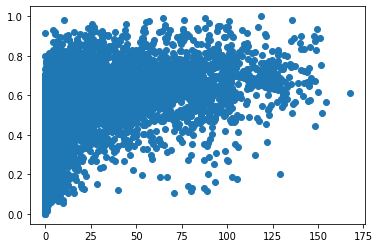

In [93]:
y_axis = [1]*len(data)
plt.scatter(data.nighttime_lights, data.Target)

In [94]:
#might have to use polynomial features

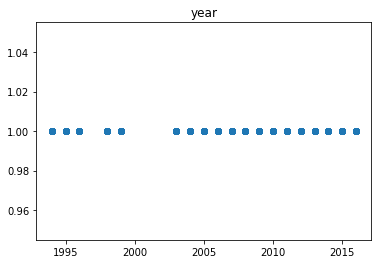

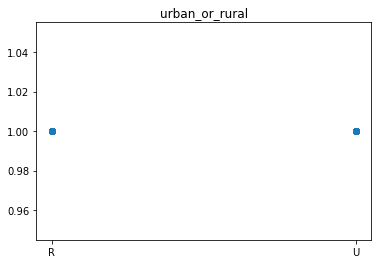

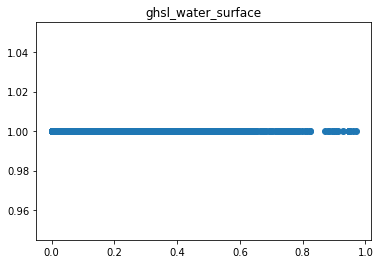

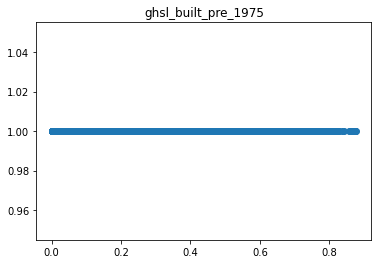

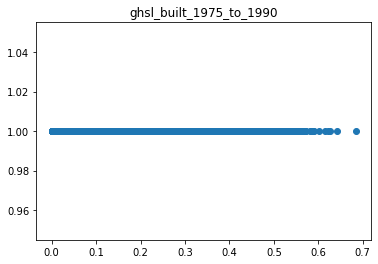

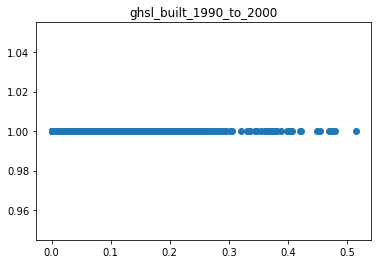

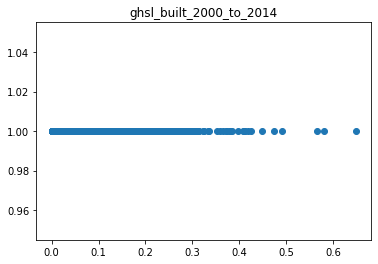

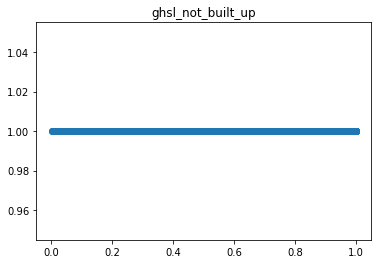

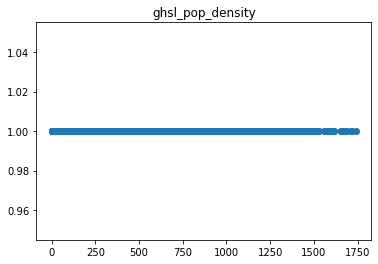

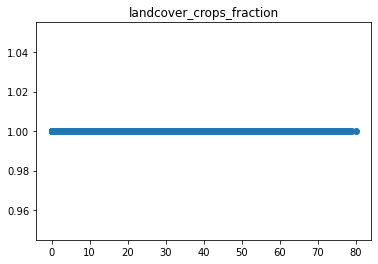

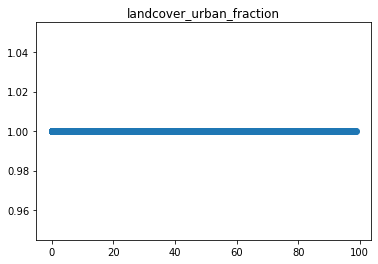

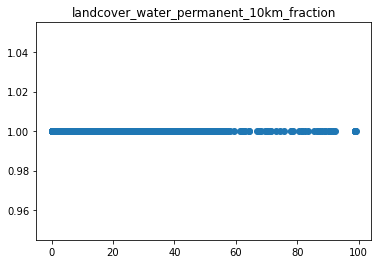

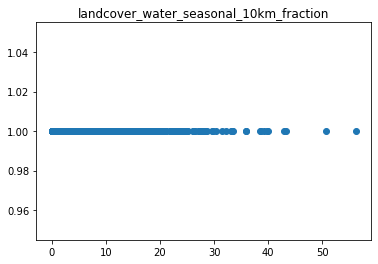

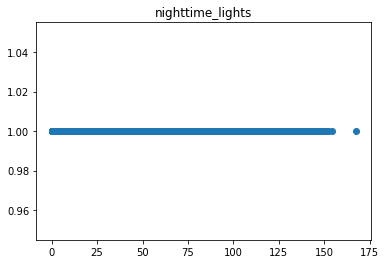

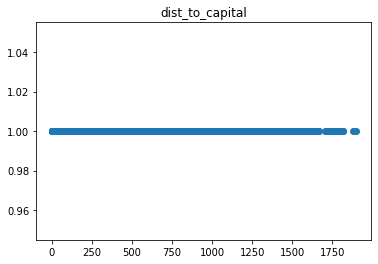

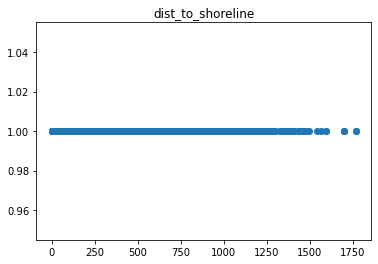

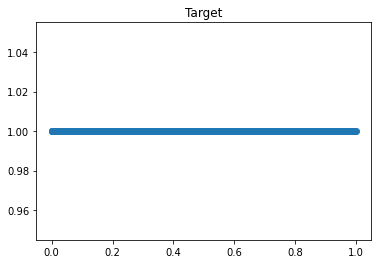

In [95]:
for column in data.columns:
    plt.scatter(data[column], y_axis)
    plt.title(column)
    plt.show()

In [96]:
data.drop(data.nighttime_lights.idxmax(), inplace=True)

In [97]:
data.drop(data[data.ghsl_built_1990_to_2000 >=0.43].index, inplace=True)

In [98]:
data.drop(data[data.ghsl_built_2000_to_2014 >=0.42].index, inplace=True)

In [99]:
data.drop(data[data.landcover_water_seasonal_10km_fraction >=38].index, inplace=True)

In [100]:
data.drop(index=data[data.dist_to_shoreline >=1625].index, inplace=True)

In [101]:
data.urban_or_rural.replace({
    'U':0,
    'R':1
}, inplace=True)

In [102]:
len(data.year)

21423

In [103]:
scaler = MinMaxScaler()
X = data.drop(columns=['Target'])
y = data.Target
col = X.columns
df = pd.DataFrame(scaler.fit_transform(X))
df.columns = col
X = df

In [104]:
X['merged_land'] = X.ghsl_not_built_up * X.landcover_urban_fraction
X.drop(columns=['ghsl_not_built_up', 'landcover_urban_fraction'], inplace=True)

In [105]:
X['merged_light'] = X.nighttime_lights+X.ghsl_pop_density 

In [106]:
X.drop(columns=['nighttime_lights', 'ghsl_pop_density','ghsl_built_pre_1975'], inplace=True)

In [107]:
data_merged = pd.merge(X, y, on=X.index)
data_merged.drop(columns=['key_0'], inplace=True)

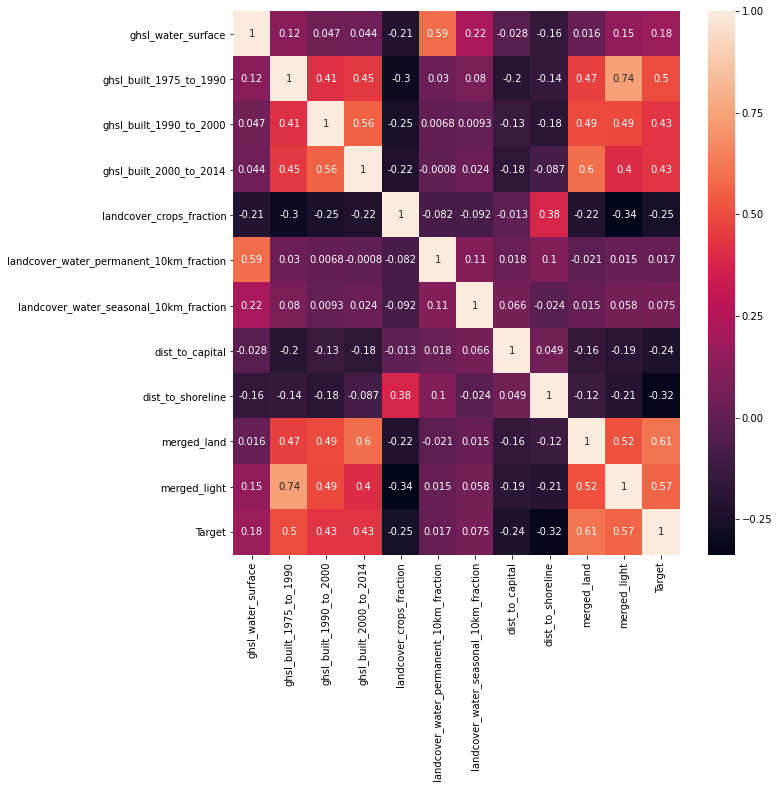

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(data_merged.drop(columns=['year','urban_or_rural']).corr(), annot=True)

In [109]:
X.isnull().sum()

year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
landcover_crops_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
dist_to_capital                            0
dist_to_shoreline                          0
merged_land                                0
merged_light                               0
dtype: int64

In [110]:
polynomial_fit = PolynomialFeatures(3)
data_pol = pd.DataFrame(polynomial_fit.fit_transform(X.drop(columns=['urban_or_rural'])))                  

In [111]:
data_pol['urban_or_rural'] = X['urban_or_rural']

In [112]:
hyper_parameter = {
    'n_estimators':[150,200],
    'max_depth':[1,2],
    'reg_alpha':[0.01, 0.2,1]
}

In [113]:
regressor = XGBRegressor(random_state=0)

In [114]:
grid_clf = GridSearchCV(regressor, hyper_parameter)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data_pol, y, test_size=0.3, random_state=0)

In [117]:
grid_clf.fit(X_train, y_train)

[00:49:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [1, 2], 'n_estimators': [150, 200],
                         'reg_alpha': [0.01, 0.2, 1]})

In [118]:
y_pred= grid_clf.predict(X_test)

In [119]:
score = r2_score(y_test, y_pred)
score

0.7371251106947911

In [ ]:
test.head()

In [ ]:
test = pd.read_csv('Test.csv')

In [ ]:
Id = pd.DataFrame(test['ID'])
test.drop(columns=['ID', 'country'], inplace=True)
test.urban_or_rural.replace({
    'U':0,
    'R':1
}, inplace=True)
test_df = scaler.transform(test)
test['merged_land'] = test.ghsl_not_built_up * test.landcover_urban_fraction

test.drop(columns=['ghsl_not_built_up', 'landcover_urban_fraction'], inplace=True)

test['merged_light'] = test.nighttime_lights+test.ghsl_pop_density

test.drop(columns=['nighttime_lights', 'ghsl_pop_density','ghsl_built_pre_1975'], inplace=True)

In [ ]:
predictions = grid_clf.predict(test)
Id['Target'] = predictions
Id.to_csv('submission.csv', index=False)